In [26]:
%pip install colorstreak

In [ ]:
from colorstreak import Logger as log
from matplotlib import pyplot as plt
import numpy as np

In [ ]:


"""
Para los mínimos cuadrados ordinarios (MCO), se busca estimar los parámetros de un modelo lineal
Beta_1
formula = sum( (x_i - x_media) * (y_i - y) ) / sum( (x_i - x_media)**2 )

Beta_0
fomula = y_media - Beta_1 * x_media

"""

def betas(x, y):
    x_media = np.mean(x)
    y_media = np.mean(y)

    numerador = np.sum( (x - x_media) * (y - y_media) )
    denominador = np.sum( (x - x_media)**2 )

    beta_1 = numerador / denominador
    beta_0 = y_media - beta_1 * x_media

    return beta_0, beta_1


def error(x, y, beta_0, beta_1):
    y_pred = beta_0 + beta_1 * x
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    return mse


def ecuacion_recta(beta_0, beta_1):
    return f"y = {beta_0:.2f} + {beta_1:.2f} * x"








# Datos de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH)
hogares =   np.array([1, 2,  3,  4,  5])
ingreso_x = np.array([6, 8, 10, 12, 14])
consumo_y = np.array([4.9, 5.6, 6.3, 7.0, 7.6])




beta_0, beta_1 = betas(ingreso_x, consumo_y)
mse = error(ingreso_x, consumo_y, beta_0, beta_1)
recta_pred = ecuacion_recta(beta_0, beta_1)

log.info(f"Beta 0: {beta_0:.2f}, Beta 1: {beta_1:.2f}")
log.info(f"Mean Squared Error: {mse:.4f}")
log.info(f"Ecuación de la recta: {recta_pred}")




x_obj = 10
y_pred_10 = beta_0 + beta_1 * x_obj
residuo = 6.3 - y_pred_10

log.step(f"Para X=10: Real=6.3, Predicho={y_pred_10:.2f}, Residuo={residuo:.2f}")

[INFO] Beta 0: 2.88, Beta 1: 0.34
[INFO] Mean Squared Error: 0.0008
[INFO] Ecuación de la recta: y = 2.88 + 0.34 * x
[STEP] Para X=10: Real=6.3, Predicho=6.28, Residuo=0.02


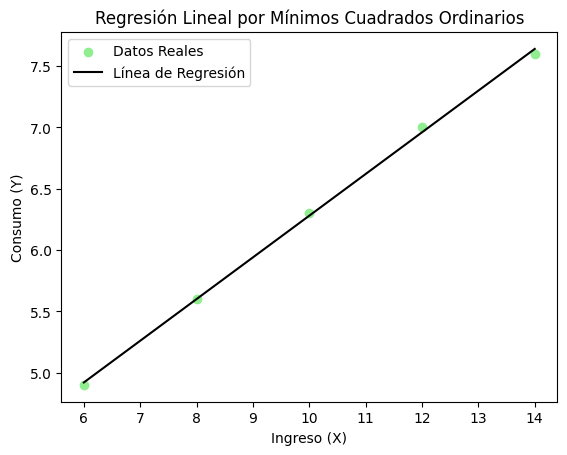

In [35]:
plt.scatter(ingreso_x, consumo_y, color='lightgreen', label='Datos Reales')
plt.plot(ingreso_x, beta_0 + beta_1 * ingreso_x, color='black', label='Línea de Regresión')
plt.xlabel('Ingreso (X)')
plt.ylabel('Consumo (Y)')
plt.title('Regresión Lineal por Mínimos Cuadrados Ordinarios')
plt.legend()
plt.show()